In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocessing
from utils import plot_figures

# Disruptive AI's Impact on Different Tasks

This notebook will show the assessment of task characteristics in relation to disruptive and consoliadting AI's Impact. Tasks impacted by disruptive AI patents are more likely to involve mental processes, require
collaborations with humans, and be unpredictable, necessitating decision-making. On the other hand, tasks impacted by
consolidating AI patents are more likely to be repetitive, independent, and primarily physical in nature. 

Figure 2

### Loading GPT - 4o's Annotation

In [12]:

categories = ['disruptive', 'consolidating', 'notexposed']
types = ['consistency', 'mental','how']  

dataframes = {}

for category in categories:
    for dtype in types:
        key = f'{category}_represent_{dtype}'
        file_path = f'/data/sg/munjkim/nokia_bell_project/data/GPT_Whole_Tasks/finalized_gpt_responses_wholetasks_{category}_{dtype}_082724.csv'
        dataframes[key] = pd.read_csv(file_path)

       
        

In [13]:

z_score_mental_gpt = preprocessing.null_model_zscore(dataframes['disruptive_represent_mental'],
                         dataframes['consolidating_represent_mental'],
                        dataframes['notexposed_represent_mental'],
                         "mental")



In [14]:
z_score_mental_gpt.columns = ['Mental', 'Physical']

In [15]:
z_score_mental_gpt

,Mental,Physical
Category,,
Consolidating,-6.705702,6.705702
Disruptive,3.793153,-3.793153
Not Exposed,2.961634,-2.961634


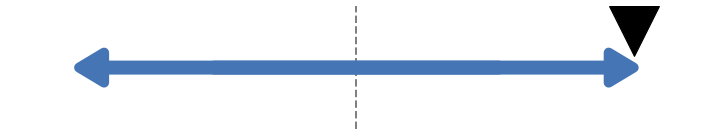

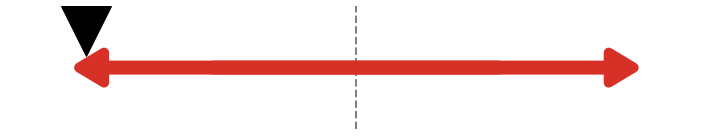

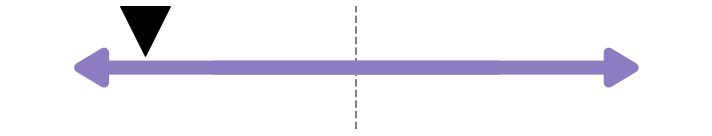

In [16]:
# data = {
#     'Category': ['Consolidating', 'Disruptive', 'Not Exposed'],
#     'Mental': [-6.760924, 3.768441, 3.015819],
#     'Physical': [6.760924, -3.768441, -3.015819]
# }

df = z_score_mental_gpt

# Normalize arrow lengths
max_length = 3.9
df['Mental_normalized'] = df['Mental'] / df['Mental'].abs().max() * max_length
df['Physical_normalized'] = df['Physical'] / df['Physical'].abs().max() * max_length



for i, index in zip(range(len(df)),z_score_mental_gpt.index):
    plot_figures.plot_category(i,df,'Mental','Physical',index)


In [17]:

z_score_consistency_gpt = preprocessing.null_model_zscore(dataframes['disruptive_represent_consistency'],
                         dataframes['consolidating_represent_consistency'],
                        dataframes['notexposed_represent_consistency'],
                         "consistency")


In [18]:
z_score_consistency_gpt.columns = ['Predictable', 'Unpredictable']

In [19]:
z_score_consistency_gpt

,Predictable,Unpredictable
Category,,
Consolidating,6.614854,-6.614854
Disruptive,-1.247533,1.247533
Not Exposed,-5.002832,5.002832


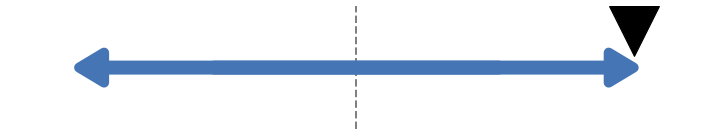

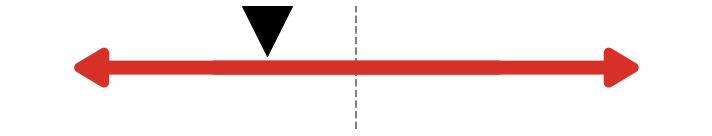

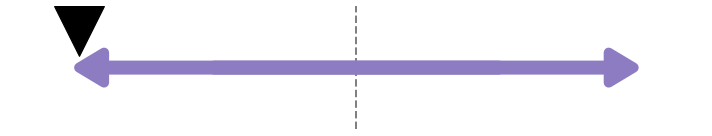

In [21]:
df = z_score_consistency_gpt

# Normalize arrow lengths
max_length = 3.9
df['Predictable_normalized'] = df['Predictable'] / df['Predictable'].abs().max() * max_length
df['Unpredictable_normalized'] = df['Unpredictable'] / df['Unpredictable'].abs().max() * max_length



for i, index in zip(range(len(df)), z_score_consistency_gpt.index):
    plot_figures.plot_category(i,df,'Unpredictable','Predictable',index)


In [36]:
z_score_how_gpt = preprocessing.null_model_zscore(dataframes['disruptive_represent_how'],
                         dataframes['consolidating_represent_how'],
                        dataframes['notexposed_represent_how'],
                         "how")

In [37]:
z_score_how_gpt.index

Index(['Consolidating', 'Disruptive', 'Not Exposed'], dtype='object', name='Category')

In [38]:
z_score_how_gpt.columns = ['Individual', 'Collaborative']

In [39]:
z_score_how_gpt

,Individual,Collaborative
Category,,
Consolidating,4.795309,-4.795309
Disruptive,1.764580,-1.764580
Not Exposed,-5.929831,5.929831


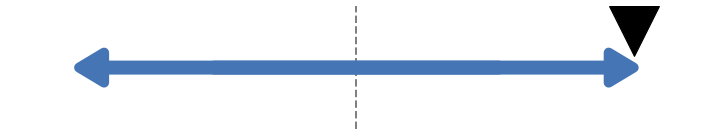

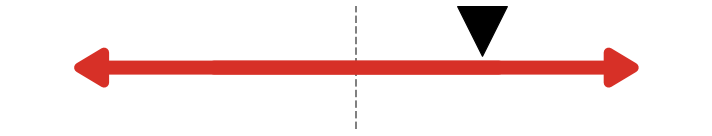

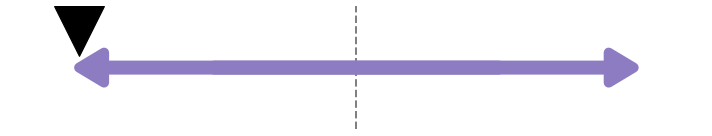

In [40]:
# data = {
#     'Category': ['Consolidating', 'Disruptive', 'Not Exposed'],
#     'Mental': [-6.760924, 3.768441, 3.015819],
#     'Physical': [6.760924, -3.768441, -3.015819]
# }

# # df = pd.DataFrame(data)

df = z_score_how_gpt

# Normalize arrow lengths
max_length = 3.9
df['Individual_normalized'] = df['Individual'] / df['Individual'].abs().max() * max_length
df['Collaborative_normalized'] = df['Collaborative'] / df['Collaborative'].abs().max() * max_length



for i, index in zip(range(len(df)), z_score_how_gpt.index):
    plot_figures.plot_category(i,df,'Collaborative','Individual',index)
